## **Cardiovascular Disease Prediction using Machine Learning**

###  **1. Project Description:**

This project aims to develop a machine learning classification model that can accurately predict the risk of cardiovascular disease (CVD) based on patient data collected during routine medical examinations.

#### **Objective:**
To analyze and process a real-world medical dataset and build a predictive model that helps in the early detection of cardiovascular diseases.

#### **Dataset Features:**

* **id** — Patient ID (unique identifier)
* **age** — Age in days
* **gender** — Gender (categorical code)
* **height** — Height in cm
* **weight** — Weight in kg
* **ap\_hi** — Systolic blood pressure (mmHg)
* **ap\_lo** — Diastolic blood pressure (mmHg)
* **cholesterol** — Cholesterol level (0: normal, 1: above normal, 2: well above normal)
* **gluc** — Glucose level (0: normal, 1: above normal, 2: well above normal)
* **smoke** — Smoking status (0: no, 1: yes)
* **alco** — Alcohol intake (0: no, 1: yes)
* **active** — Physical activity (0: no, 1: yes)
* **cardio** — Cardiovascular disease presence (0: no, 1: yes — target)


#### **Dataset Source:**
The dataset used in this project was obtained from Kaggle:  
[Cardiovascular Disease Dataset on Kaggle](https://www.kaggle.com/datasets/akshatshaw7/cardiovascular-disease-dataset)

Proper credit is given to the original dataset contributor, **AKSHAT**, for making the data publicly available for research and educational purposes. 

### **2. Importing Libraries**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
# Warnings
import warnings
warnings.filterwarnings('ignore')


### **3. Load the Dataset**

In [2]:
df = pd.read_csv('health_data.csv', index_col=0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


Check the number of rows and columns in the dataset to understand its size.

In [3]:
df.shape

(70000, 13)

### **4. Data Cleaning and Inspection**

Shows column data types and missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  float64
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  float64
 6   ap_lo        70000 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 7.5 MB


Remove 'id' column as it is not needed for analysis

In [5]:
df.drop('id', axis=1, inplace=True)

Convert age from days to years and round to 1 decimal place

In [6]:
df['age'] = (df['age'] / 365).round(1)  # rounded to 1 decimal


Check for missing values in each column

In [7]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Check data types of each column

In [8]:
df.dtypes

age            float64
gender           int64
height         float64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

Convert selected float columns to integers and verify changes

In [9]:
# Convert specific float columns to int
df['age'] = df['age'].astype(int)
df['height'] = df['height'].astype(int)
df['weight'] = df['weight'].astype(int)
df['ap_hi'] = df['ap_hi'].astype(int)
df['ap_lo'] = df['ap_lo'].astype(int)

# Check the new data types
print(df.dtypes)


age            int32
gender         int64
height         int32
weight         int32
ap_hi          int32
ap_lo          int32
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object


Remove duplicate rows and display updated row count

In [10]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

print(f"Number of rows after removing duplicates: {df.shape[0]}")


Number of rows after removing duplicates: 66771


Rename columns for improved readability

In [11]:
# Rename columns for better clarity
df.rename(columns={
    'ap_hi': 'systolic_bp',
    'ap_lo': 'diastolic_bp',
    'gluc': 'glucose',
    'alco': 'alcohol',
    'smoke': 'smoking',
    'cardio': 'cardiovascular_disease'
}, inplace=True)

df.columns


Index(['age', 'gender', 'height', 'weight', 'systolic_bp', 'diastolic_bp',
       'cholesterol', 'glucose', 'smoking', 'alcohol', 'active',
       'cardiovascular_disease'],
      dtype='object')

Display unique values in categorical columns to understand data categories

In [12]:
# Check unique values in all categorical columns
print("Gender:", df['gender'].unique())
print("Cholesterol:", df['cholesterol'].unique())
print("glucose:", df['glucose'].unique())
print("smoking:", df['smoking'].unique())
print("alcohol:", df['alcohol'].unique())
print("Active:", df['active'].unique())
print("cardiovascular_disease:", df['cardiovascular_disease'].unique())


Gender: [1 0]
Cholesterol: [0 2 1]
glucose: [0 1 2]
smoking: [0 1]
alcohol: [0 1]
Active: [1 0]
cardiovascular_disease: [0 1]


 **Unique Values of Categorical Columns:**

- **Gender**: [0 = Female, 1 = Male]  
- **Cholesterol**: [0 = Normal, 1 = Above Normal, 2 = Well Above Normal]  
- **Glucose**: [0 = Normal, 1 = Above Normal, 2 = Well Above Normal]  
- **Smoking**: [0 = No, 1 = Yes]  
- **Alcohol Intake**: [0 = No, 1 = Yes]  
- **Physical Activity**: [0 = No, 1 = Yes]  
- **Cardiovascular Disease**: [0 = No, 1 = Yes]


Plotting boxplots for key numerical features to visualize distributions and detect outliers

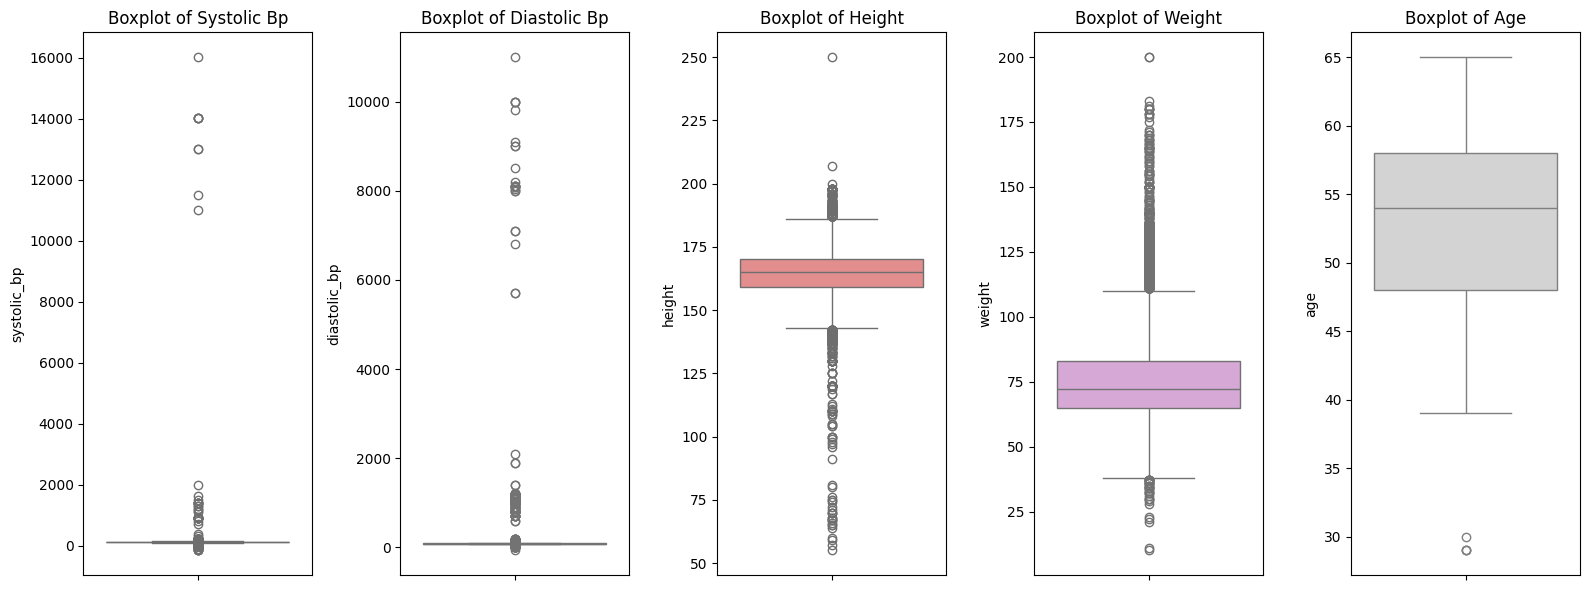

In [13]:
# Set up the figure
plt.figure(figsize=(16, 6))

# Features to plot
features = ['systolic_bp', 'diastolic_bp', 'height', 'weight', 'age']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'plum', 'lightgray']

# Create a boxplot for each feature
for i, (feature, color) in enumerate(zip(features, colors), 1):
    plt.subplot(1, len(features), i)
    sns.boxplot(y=df[feature], color=color)
    plt.title(f'Boxplot of {feature.replace("_", " ").title()}')

plt.tight_layout()
plt.show()


**Boxplot Observation**:

Systolic & Diastolic BP: Some values exceed 16,000 and 10,000, which are medically unrealistic – likely data entry errors.

Height: Some heights are shown between 50–70 cm, which is unrealistic for adults.

Weight: A few entries are as low as 10–30 kg or above 200 kg – indicating extremely low or high weights, possibly incorrect values.



 Remove outliers based on height and weight using domain-specific valid ranges
 This helps eliminate unrealistic measurements that may affect model performance

In [14]:
# Define valid ranges
valid_height_range = (135, 200)
valid_weight_range = (35, 200)

# Filter out invalid height
df = df[(df['height'] >= valid_height_range[0]) & (df['height'] <= valid_height_range[1])]

# Filter out invalid weight
df = df[(df['weight'] >= valid_weight_range[0]) & (df['weight'] <= valid_weight_range[1])]

# Check new shape
df.shape


(66635, 12)

Based on clinical guidelines from the American Heart Association (AHA), the valid range for blood pressure was defined as:
- **Systolic BP**: 70 to 200 mmHg
- **Diastolic BP**: 40 to 120 mmHg

Values beyond these ranges — particularly **systolic > 200** or **diastolic > 120** — are considered either biologically implausible or rare hypertensive crisis cases, and are treated as outliers to improve data quality and modeling reliability.

Source: [AHA Blood Pressure Readings](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)


In [15]:
# Define valid ranges (adjust based on medical knowledge)
valid_systolic_range = (70, 200)
valid_diastolic_range = (40, 120)

# Filter out invalid systolic BP
df = df[(df['systolic_bp'] >= valid_systolic_range[0]) & (df['systolic_bp'] <= valid_systolic_range[1])]

# Filter out invalid diastolic BP
df = df[(df['diastolic_bp'] >= valid_diastolic_range[0]) & (df['diastolic_bp'] <= valid_diastolic_range[1])]
df.shape

(65278, 12)

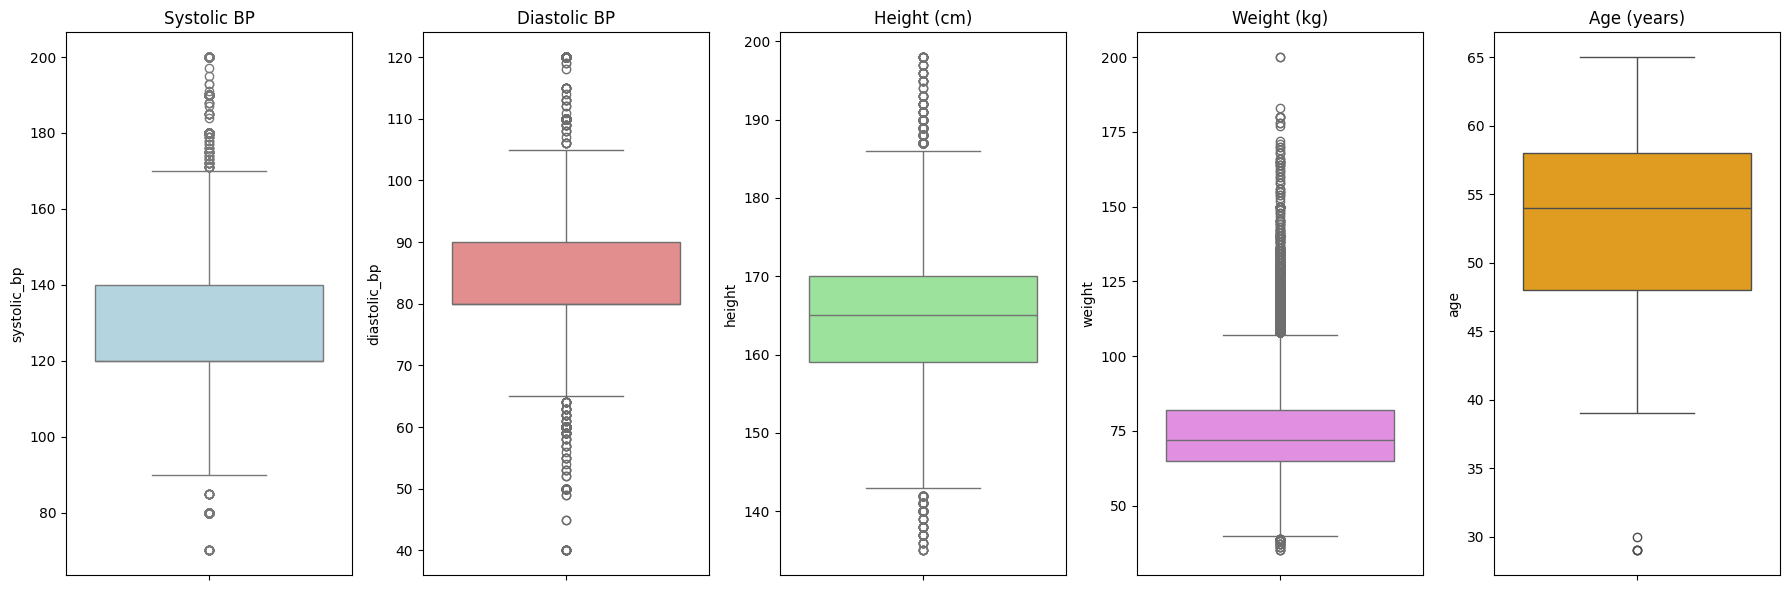

In [16]:
plt.figure(figsize=(18, 6))  # Adjusted figure size to fit all subplots

# Systolic BP
plt.subplot(1, 5, 1)
sns.boxplot(y=df['systolic_bp'], color='lightblue')
plt.title('Systolic BP')

# Diastolic BP
plt.subplot(1, 5, 2)
sns.boxplot(y=df['diastolic_bp'], color='lightcoral')
plt.title('Diastolic BP')

# Height
plt.subplot(1, 5, 3)
sns.boxplot(y=df['height'], color='lightgreen')
plt.title('Height (cm)')

# Weight
plt.subplot(1, 5, 4)
sns.boxplot(y=df['weight'], color='violet')
plt.title('Weight (kg)')

# Age
plt.subplot(1, 5, 5)
sns.boxplot(y=df['age'], color='orange')
plt.title('Age (years)')

plt.tight_layout()
plt.show()

**Interpretation:**
* Unrealistic values have been removed based on valid medical ranges.
* Systolic and diastolic BP, height, and weight now appear within expected limits.
* Remaining outliers are plausible and indicate natural variability.



### **5. Exploratory Data Analysis (EDA)**

Summary statistics of numerical features

In [17]:
df.describe()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol,active,cardiovascular_disease
count,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000
mean,52.889687,0.355219,164.433301,74.421275,126.860075,81.361669,0.380572,0.235485,0.092114,0.055976,0.798186,0.506419
std,6.808216,0.478583,7.933540,14.449053,16.794152,9.536796,0.688956,0.581621,0.289189,0.229877,0.401357,0.499963
min,29.000000,0.000000,135.000000,35.000000,70.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,1.000000,198.000000,200.000000,200.000000,120.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


**Interpretation of Descriptive Statistics:**

The average age of people is around 53 years, with the youngest being 29 and oldest 65.

Most people have normal cholesterol and glucose, as the mean is closer to 0.

Blood pressure values show some people may have high systolic (up to 200) and diastolic (up to 120) pressure.

Most people are physically active (mean ≈ 0.8) and non-smokers (mean ≈ 0.09).

The gender column shows more females (0) than males (1), based on the average value (~0.36).

Distribution of Numerical Features with Histograms and KDE

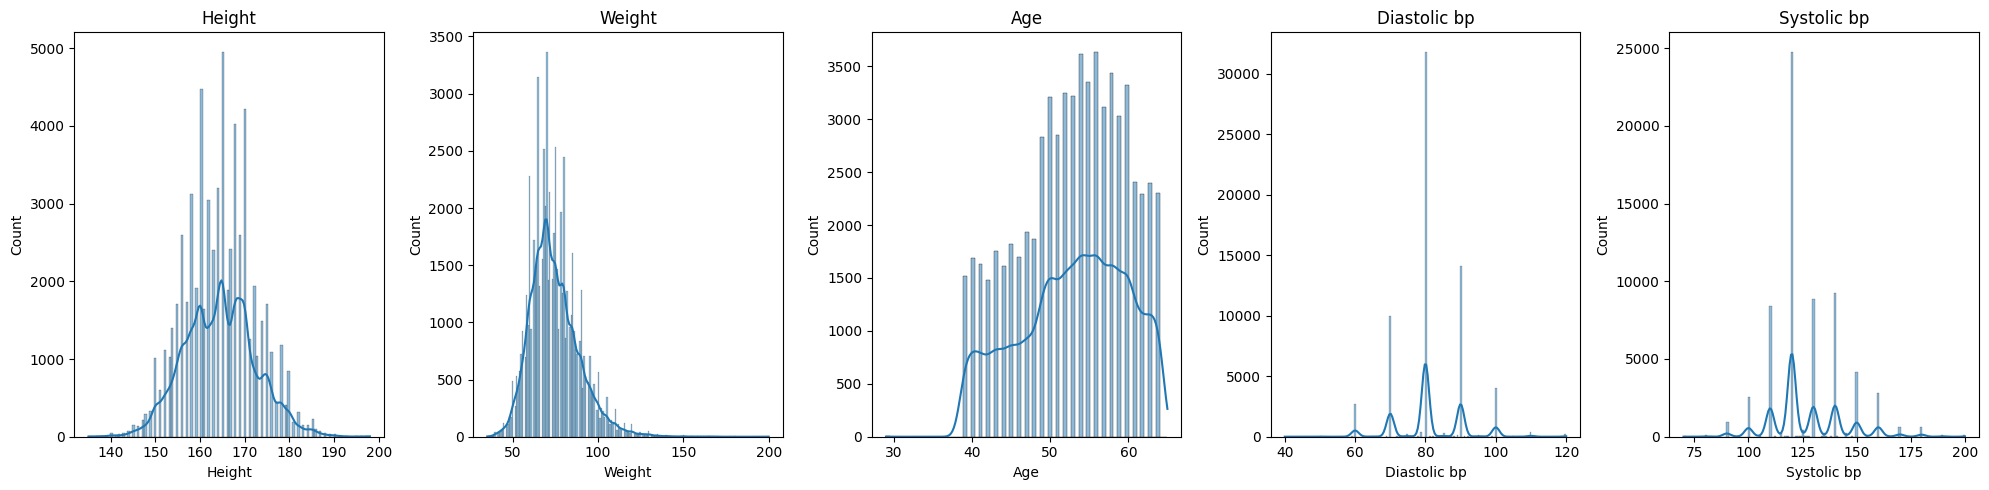

In [18]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(['height', 'weight', 'age', 'diastolic_bp', 'systolic_bp']):
    plt.subplot(1, 5, i+1)  # 1 row, 5 columns
    sns.histplot(df[col], kde=True)
    plt.title(f'{col.replace("_", " ").capitalize()}')
    plt.xlabel(col.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()


**Interpretation of Numerical Variable Distributions:**

1. **Height**: Roughly normal distribution centered around 165–170 cm. Minor right skew.

2. **Weight**: Right-skewed; majority between 50–80 kg. Some outliers at higher weights.

3. **Age**: Mostly concentrated between 45–65 years. Distribution is slightly left-skewed.

4. **Diastolic BP (ap_lo)**: Most values around 80 mmHg, but visible spikes suggest possible data entry issues.

5. **Systolic BP (ap_hi)**: Peaks around 120 mmHg. Also shows abnormal spikes, indicating possible errors or outliers.


Distribution of Categorical Features with Count Plots

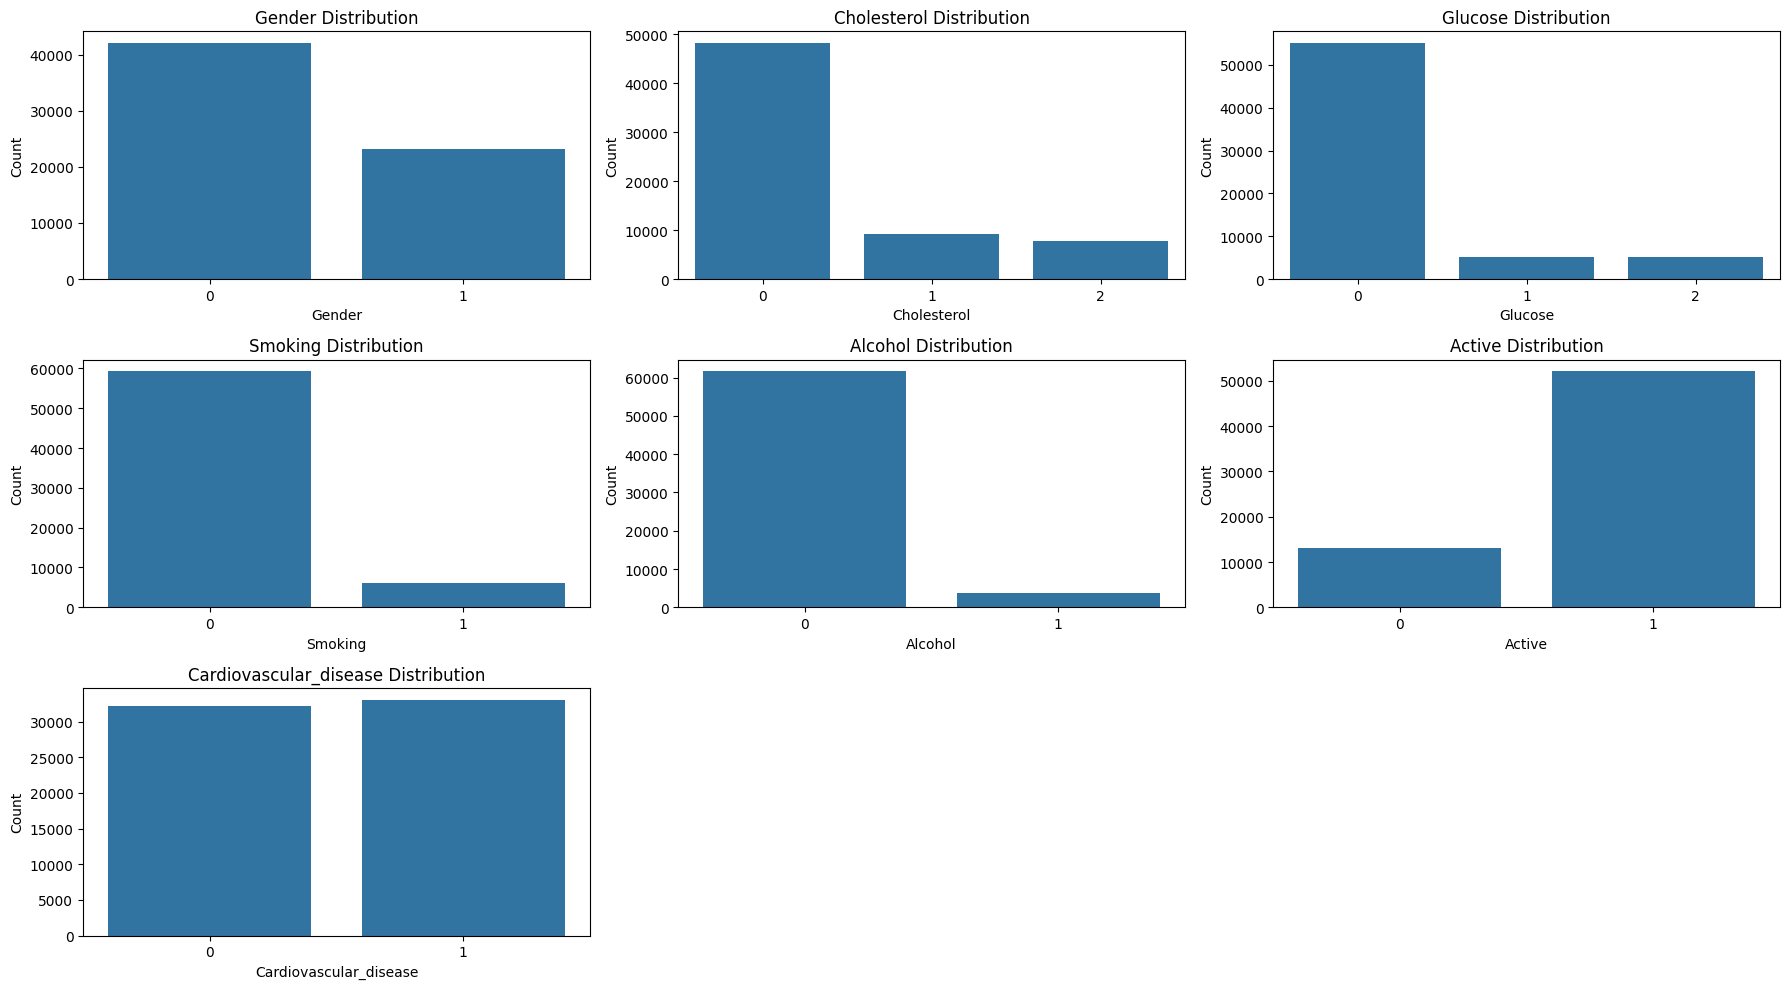

In [19]:
categorical_cols = ['gender', 'cholesterol', 'glucose', 'smoking', 'alcohol', 'active', 'cardiovascular_disease']

plt.figure(figsize=(18, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Interpretation of Categorical Variable Distributions:**

1. **Gender**: More females than males; slight imbalance.

2. **Cholesterol**: Most have normal levels; some show elevated or high cholesterol.

3. **Glucose**: Majority have normal glucose; right-skewed with few high values.

4. **Smoking**: Most are non-smokers; feature is highly imbalanced.

5. **Alcohol**: Majority don't consume alcohol; also imbalanced.

6. **Physical Activity**: Most are physically active, which may reduce heart risk.

7. **Cardiovascular Disease**: Nearly balanced — ideal for classification models.


Correlation Heatmap of Numerical Features

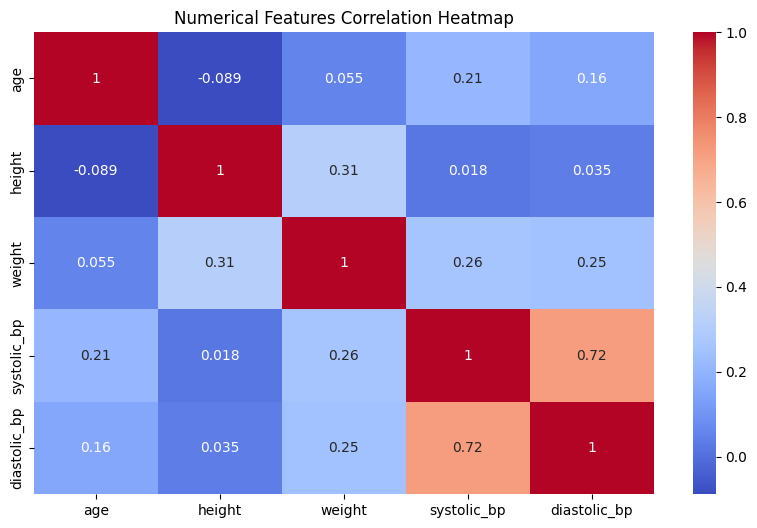

In [20]:
numerical_cols = ['age', 'height', 'weight', 'systolic_bp', 'diastolic_bp']  
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numerical Features Correlation Heatmap')
plt.show()


**Interpretation:**
* Strong positive correlation (0.72) between systolic and diastolic BP.
* Weak positive correlations between weight and blood pressure (around 0.25-0.26).
* Weak positive correlation between age and systolic BP (0.21), very weak with diastolic BP (0.16).
* Moderate positive correlation between height and weight (0.31).
* Very weak negative correlation (-0.089) between age and height.

Violin Plots for Numerical Features vs Cardiovascular Disease

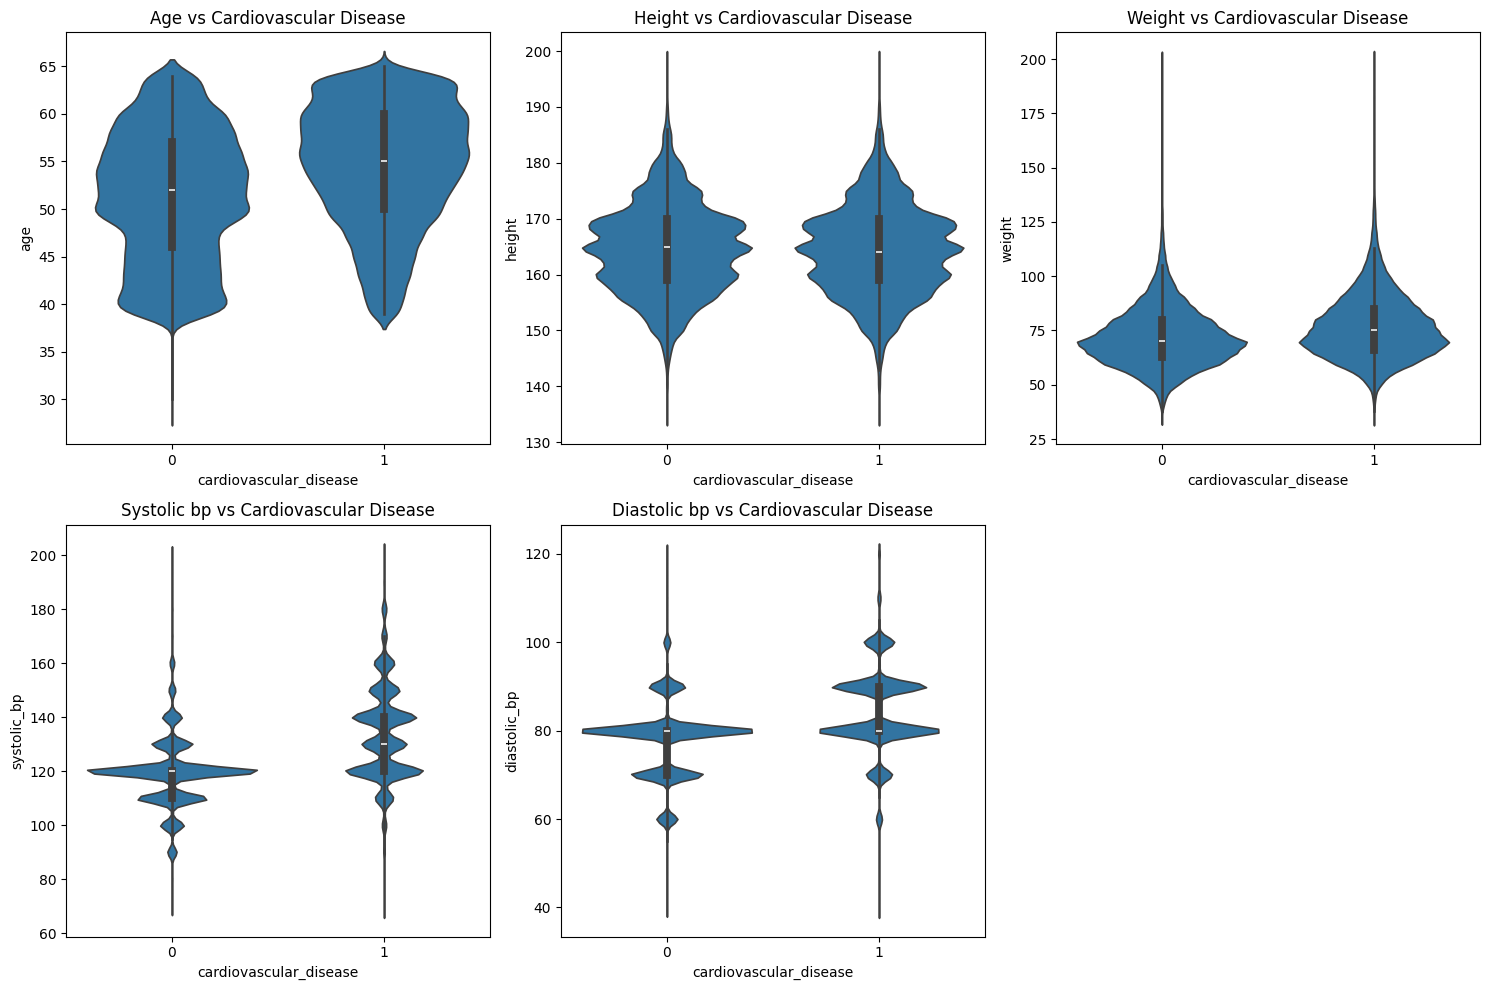

In [21]:
numerical_cols = ['age', 'height', 'weight', 'systolic_bp', 'diastolic_bp']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(x='cardiovascular_disease', y=col, data=df)
    plt.title(f'{col.replace("_", " ").capitalize()} vs Cardiovascular Disease')
plt.tight_layout()
plt.show()


**Interpretation:**
* Older age, higher systolic and diastolic blood pressure are more common with the disease.
* Slightly higher weight might be linked to the disease.
* Height doesn't seem to differ much between the groups.
* These factors might be related to having cardiovascular disease.

Categorical Features vs Cardiovascular Disease with Countplots

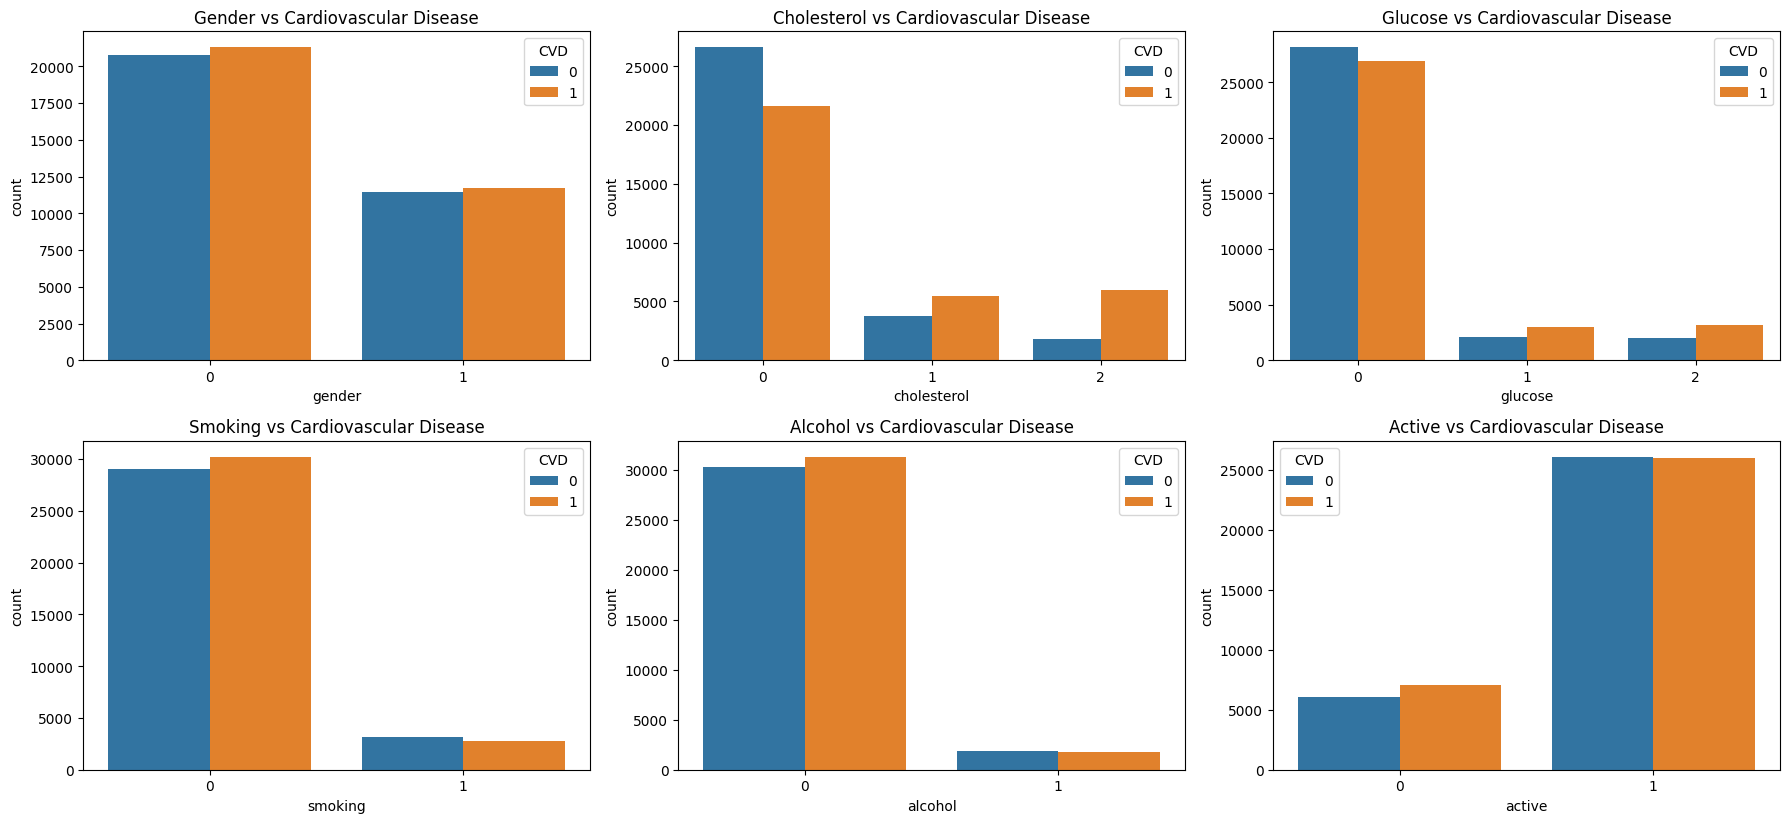

In [22]:
categorical_cols = ['gender', 'cholesterol', 'glucose', 'smoking', 'alcohol', 'active']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, hue='cardiovascular_disease', data=df)
    plt.title(f'{col.capitalize()} vs Cardiovascular Disease')
    plt.legend(title='CVD')
plt.tight_layout()
plt.show()




  **Interpretation:**

* People with **high cholesterol and glucose** levels often have more heart disease.
* There is a **small difference between genders** in heart disease cases.
* People who are **not physically active** have slightly more heart problems.
* **Smoking and drinking** don’t show a big difference in heart disease.
* **Cholesterol and glucose** levels are the most important to watch for heart issues.



### **6. Feature Selection**

Selecting Top 8 Features Using ANOVA F-test

In [23]:
y = df['cardiovascular_disease']
X = df.drop('cardiovascular_disease', axis=1)

selector = SelectKBest(f_classif, k=8).fit(X, y)
X = X[X.columns[selector.get_support()]]  # Update X with selected features only

print("Selected features:", X.columns.tolist())

Selected features: ['age', 'weight', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'glucose', 'smoking', 'active']


### **7. Data Preprocessing (Splitting & Scaling)**

Data split into train (80%) and test (20%) sets with stratified sampling to keep target distribution.

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 52222
Test set size: 13056


Standardized numerical features using training data scaler, then applied to test data.

In [25]:
num_cols = ['age', 'weight', 'systolic_bp', 'diastolic_bp']

scaler = StandardScaler()

# Fit scaler on training data only
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Use the same scaler for test data
X_test[num_cols] = scaler.transform(X_test[num_cols])


### **8. Model Training**

Train  Logistic Regression model on training data.

In [26]:
model_logreg = LogisticRegression(random_state=42)
model_logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Train Random Forest model on training data.

In [27]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Train XGBoost model on training data.

In [28]:
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Train Decision Tree classifier on training data.

In [29]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

Train K-Nearest Neighbors (KNN) classifier on the training data.

In [30]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

Train Gaussian Naive Bayes model on the training data.

In [31]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

Train Gradient Boosting Classifier on the training data.

In [32]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier()

### **9. Model Testing and Evaluation**

Evaluate Logistic Regression model using accuracy, confusion matrix, and classification report.

In [33]:
y_pred_logreg = model_logreg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7271
Confusion Matrix:
 [[4952 1492]
 [2071 4541]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      6444
           1       0.75      0.69      0.72      6612

    accuracy                           0.73     13056
   macro avg       0.73      0.73      0.73     13056
weighted avg       0.73      0.73      0.73     13056



Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      6444
           1       0.75      0.69      0.72      6612

    accuracy                           0.73     13056
   macro avg       0.73      0.73      0.73     13056
weighted avg       0.73      0.73      0.73     13056



Evaluate Random Forest model using accuracy, confusion matrix, and classification report.

In [34]:
y_pred_rf = model_rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6878
Confusion Matrix:
 [[4516 1928]
 [2148 4464]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      6444
           1       0.70      0.68      0.69      6612

    accuracy                           0.69     13056
   macro avg       0.69      0.69      0.69     13056
weighted avg       0.69      0.69      0.69     13056



Evaluate XGBoost model using accuracy, confusion matrix, and classification report.

In [35]:
y_pred_xgb = model_xgb.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7309
Confusion Matrix:
 [[4914 1530]
 [1984 4628]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74      6444
           1       0.75      0.70      0.72      6612

    accuracy                           0.73     13056
   macro avg       0.73      0.73      0.73     13056
weighted avg       0.73      0.73      0.73     13056



Evaluate Decision Tree model using accuracy, confusion matrix, and classification report.

In [36]:
y_pred_dt = model_dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6458
Confusion Matrix:
 [[4552 1892]
 [2733 3879]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66      6444
           1       0.67      0.59      0.63      6612

    accuracy                           0.65     13056
   macro avg       0.65      0.65      0.64     13056
weighted avg       0.65      0.65      0.64     13056



Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.66      6444
           1       0.67      0.59      0.63      6612

    accuracy                           0.65     13056
   macro avg       0.65      0.65      0.65     13056
weighted avg       0.65      0.65      0.65     13056



Evaluate KNN model using accuracy, confusion matrix, and classification report.

In [37]:
y_pred_knn = model_knn.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.6919
Confusion Matrix:
 [[4474 1970]
 [2052 4560]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      6444
           1       0.70      0.69      0.69      6612

    accuracy                           0.69     13056
   macro avg       0.69      0.69      0.69     13056
weighted avg       0.69      0.69      0.69     13056



Evaluate Naive Bayes model using accuracy, confusion matrix, and classification report.

In [38]:
y_pred_nb = model_nb.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7103
Confusion Matrix:
 [[5170 1274]
 [2508 4104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73      6444
           1       0.76      0.62      0.68      6612

    accuracy                           0.71     13056
   macro avg       0.72      0.71      0.71     13056
weighted avg       0.72      0.71      0.71     13056



Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73      6444
           1       0.76      0.62      0.68      6612

    accuracy                           0.71     13056
   macro avg       0.72      0.71      0.71     13056
weighted avg       0.72      0.71      0.71     13056



Evaluate Gradient Boosting model using accuracy, confusion matrix, and classification report.

In [39]:
y_pred_gb = model_gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7326
Confusion Matrix:
 [[4920 1524]
 [1967 4645]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74      6444
           1       0.75      0.70      0.73      6612

    accuracy                           0.73     13056
   macro avg       0.73      0.73      0.73     13056
weighted avg       0.73      0.73      0.73     13056



Comparison of model performance based on test accuracy.

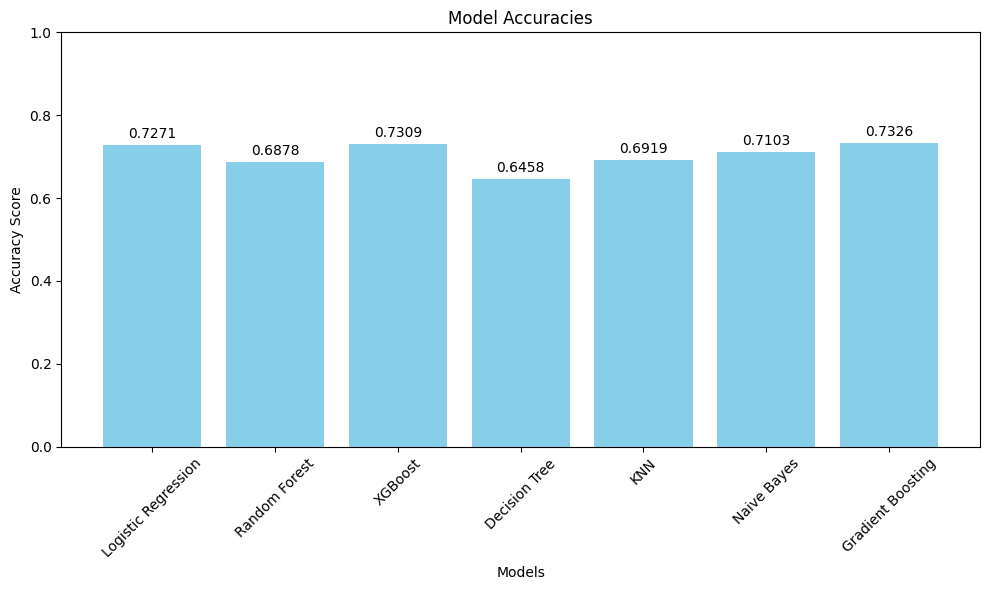

In [40]:
models = {
    'Logistic Regression': model_logreg,
    'Random Forest': model_rf,
    'XGBoost': model_xgb,
    'Decision Tree': model_dt,
    'KNN': model_knn,
    'Naive Bayes': model_nb,
    'Gradient Boosting': model_gb}
accuracies = {}
conf_matrices = {}
for name, mdl in models.items():
    y_pred = mdl.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylim(0, 1)
plt.title("Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Actual vs predicted labels for 50 test samples across all models

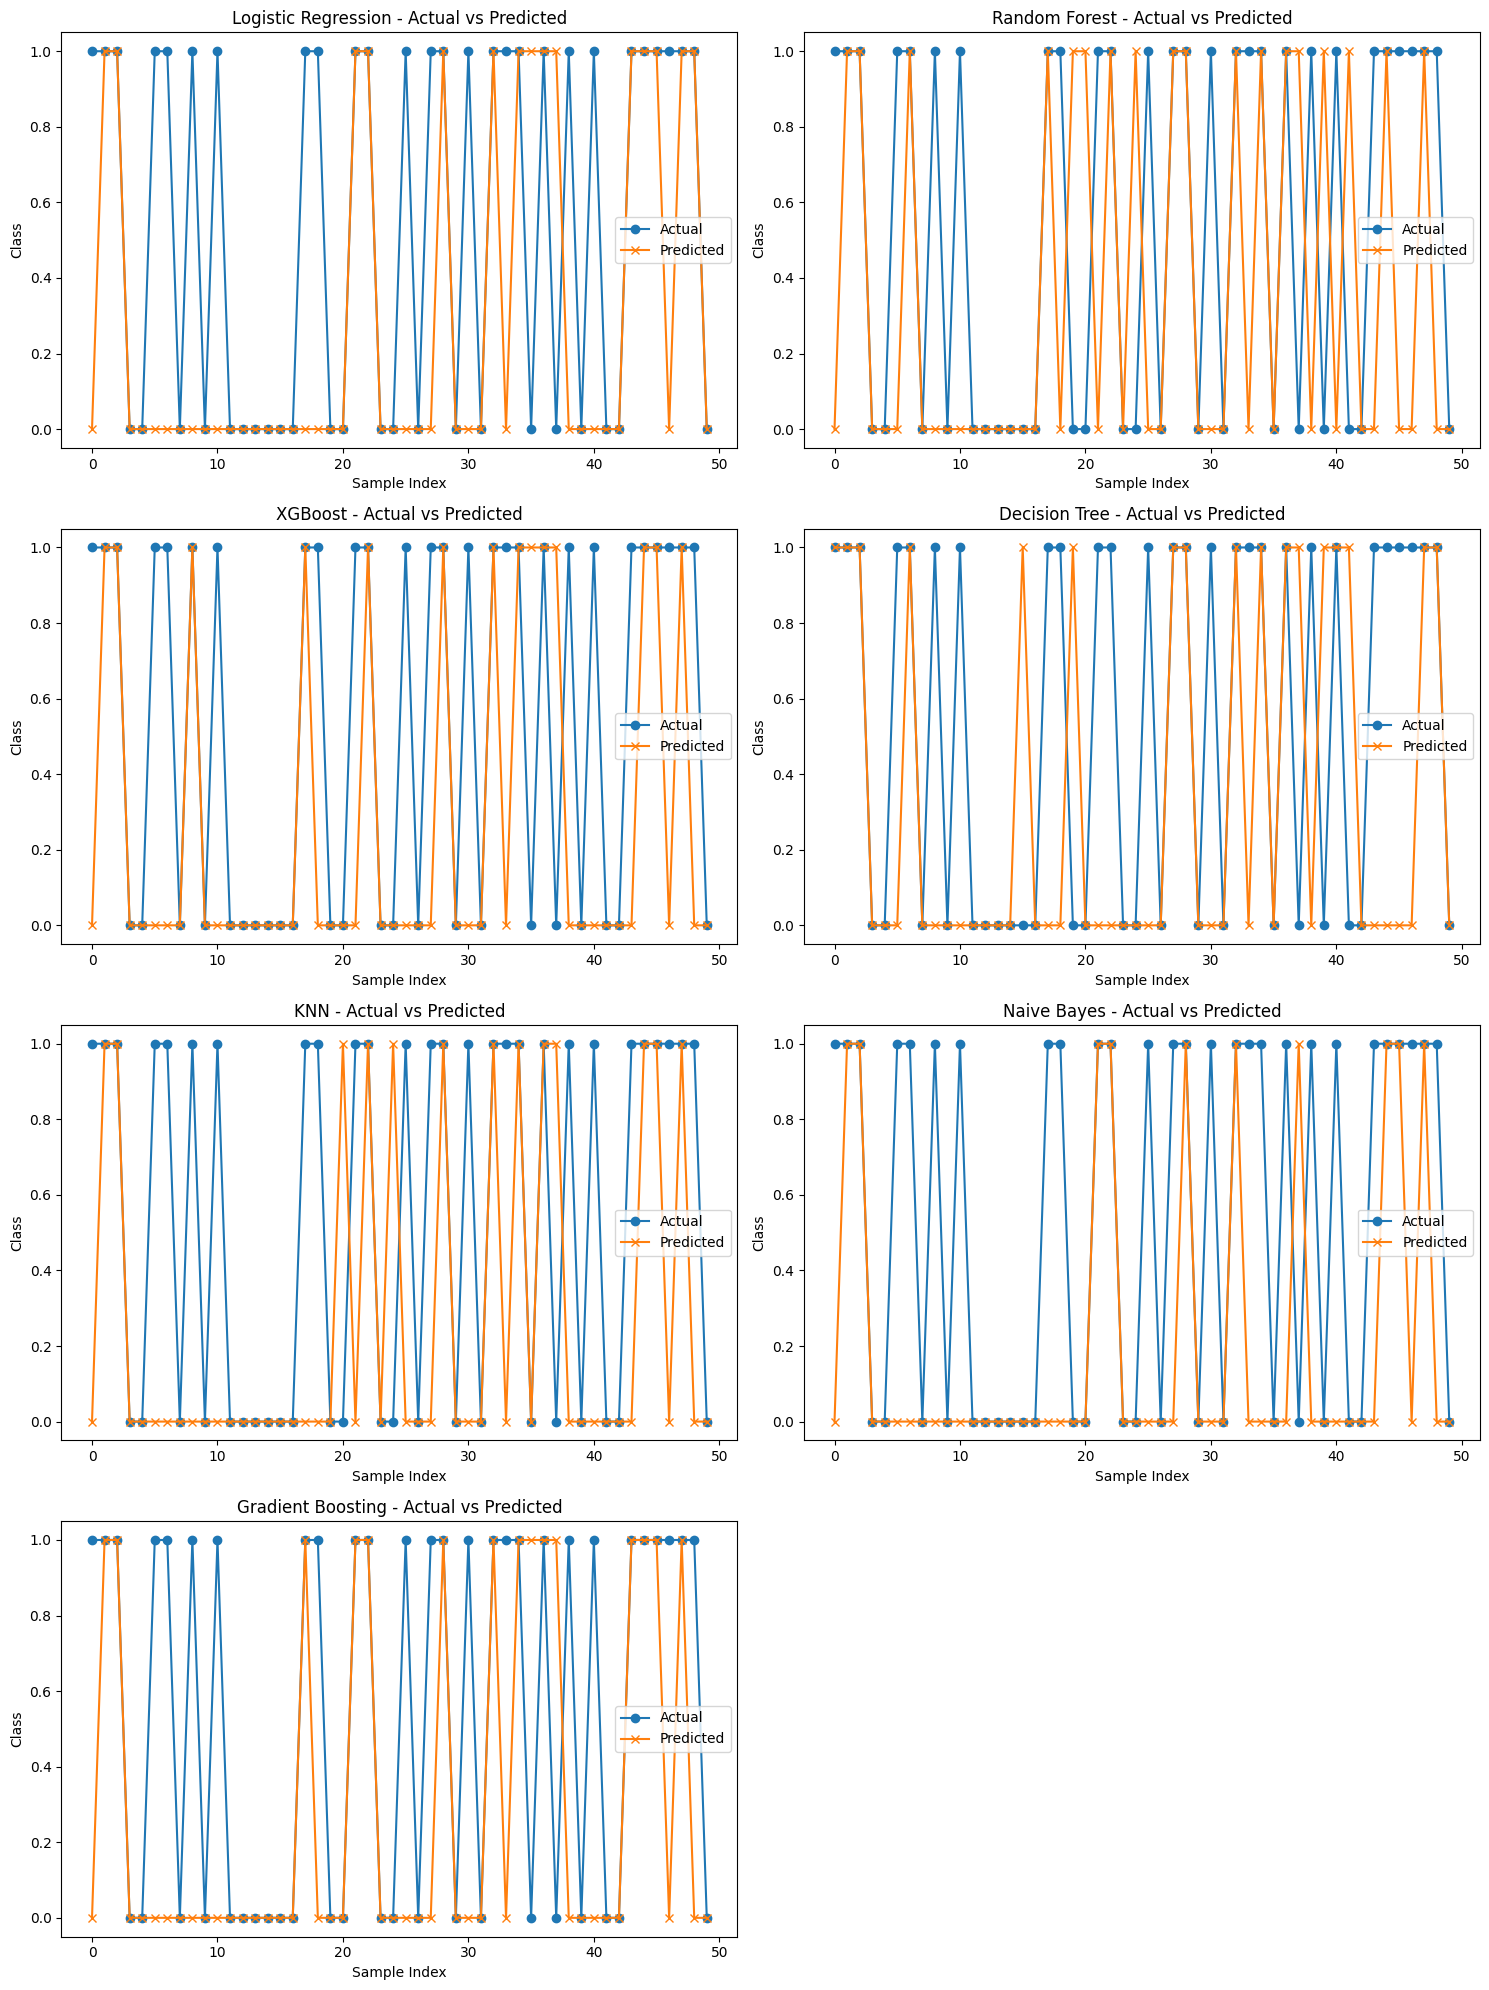

In [41]:
# Number of test samples to plot
num_samples = 50
sample_indices = X_test.index[:num_samples]
y_actual = y_test.loc[sample_indices] if hasattr(y_test, 'loc') else y_test[:num_samples]

# Plot settings
plt.figure(figsize=(15, 20))
for i, (name, mdl) in enumerate(models.items(), 1):
    y_pred = mdl.predict(X_test)
    y_pred_sample = y_pred[:num_samples]

    plt.subplot((len(models) + 1) // 2, 2, i)
    plt.plot(range(num_samples), y_actual, label='Actual', marker='o')
    plt.plot(range(num_samples), y_pred_sample, label='Predicted', marker='x')
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Class')
    plt.legend()

plt.tight_layout()
plt.show()


###  **Insights**
- Gradient Boosting performs best with an accuracy of 73.26%, closely followed by XGBoost and Logistic Regression.

- Naive Bayes also performs well at 71.03%, especially considering its simplicity.

- Random Forest (68.78%) and Decision Tree (64.71%) are underperforming compared to others — suggesting overfitting or lack of tuning.

- All models perform relatively close, indicating that the features are generally informative and the dataset is well-prepared.